# More about Regularization

## 1.Why regularization?
Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it. 

![regularization](https://www.simplilearn.com/ice9/free_resources_article_thumb/regularization.JPG)


### A graphical illustration

Consider the model
$$wage =w_1 educ + w_2 exper + u$$ 

In [1]:
import wooldridge as woo
df = woo.data("wage1")

We create a contour plot for w1 and w2 and the corresponding values of the OLS loss function $\sum[wage-(w_1 educ+ w_2 exper)]^2$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
w1 = np.linspace(-1,1,100)
w2 = np.linspace(-1,1,100)

W1, W2 = np.meshgrid(w1,w2) #generate combinations: 
print(W1.shape, W2.shape)

(100, 100) (100, 100)


In [4]:
wage = df["wage"].to_numpy().reshape((1,-1))
educ = df["educ"].to_numpy().reshape((1,-1))
exper = df["exper"].to_numpy().reshape((1,-1))

In [5]:
Loss = np.sum((np.dot(np.ones((100,100,1)),wage) - (np.dot(W1[:,:,np.newaxis],educ)+np.dot(W2[:,:,np.newaxis],exper)))**2,-1)

In [6]:
#OLS result: 
X = df[["educ","exper"]]
y = df["wage"]
b1,b2 = np.linalg.inv(X.T@X)@X.T@y
b1,b2

(0.41704633784726136, 0.04543816656827958)

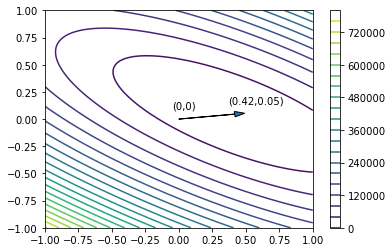

In [7]:
# Graphical representation of OLS regression and the minimum point
plt.contour(w1,w2,Loss, levels=20)
plt.arrow(0,0,b1,b2,head_width=0.05) # draw arrow pointing to the minimum point
plt.text(-0.05,0.1,"(0,0)") # label the origin
plt.text(b1-0.05,b2+0.1,f"({b1:.2f},{b2:.2f})") # label the origin
plt.colorbar()
plt.show()

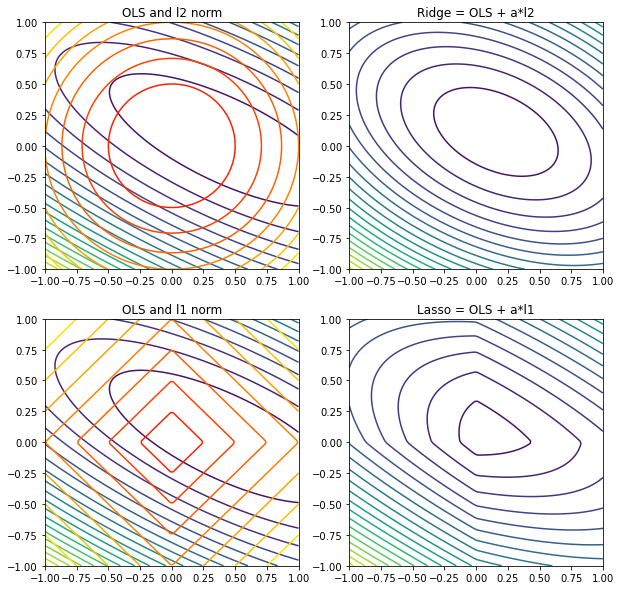

In [8]:
# The effect of regularization
# regularization means: Do not go too far! (do not overfit the current sample)
fig, axs = plt.subplots(2,2, figsize=(10,10))

# ridge
axs[0,0].contour(w1,w2,Loss, levels=20)
l2_norm = np.sum(W1[:,:,np.newaxis]**2+W2[:,:,np.newaxis]**2,-1)
axs[0,0].contour(w1,w2,l2_norm, cmap="autumn")
axs[0,0].set_title("OLS and l2 norm")

Loss_ridge = Loss +  100000 * l2_norm # the choice of the complexity parameter(shrinkage) is discretionary
axs[0,1].contour(w1,w2, Loss_ridge, levels=20)
axs[0,1].set_title("Ridge = OLS + a*l2")

# lasso
axs[1,0].contour(w1,w2,Loss, levels=20)
l1_norm = np.sum(abs(W1[:,:,np.newaxis])+abs(W2[:,:,np.newaxis]),-1)
axs[1,0].contour(w1,w2,l1_norm, cmap="autumn")
axs[1,0].set_title("OLS and l1 norm")

Loss_Lasso = Loss +  100000 * l1_norm # the choice of the complexity parameter(shrinkage) is discretionary
axs[1,1].contour(w1,w2, Loss_Lasso, levels=20)
axs[1,1].set_title("Lasso = OLS + a*l1")

plt.show()

> The regularization term is a leash with a specific shape.

## 2.Ridge Regularization : 

Also known as Ridge Regression, it modifies the over-fitted or under fitted models by adding the penalty equivalent to the sum of the squares of the magnitude of coefficients.

This means that the mathematical function representing our machine learning model is minimized and coefficients are calculated. The magnitude of coefficients is squared and added. Ridge Regression performs regularization by shrinking the coefficients present. The function depicted below shows the cost function of ridge regression :


$$\min Loss + \alpha||\vec{w}||_2^2$$

where $||\vec{w}||_2 = \sqrt{\sum_p w^2}$ is the Euclidean norm or $\mathscr{l^2}-norm$. The complexity parameter $\alpha>= 0$ controls the amount of shrinkage: the larger the value of $\alpha$ , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [9]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=10000, fit_intercept=False) # set the complexity parameter (amount of shrinkage)

#fit the model with X,y
reg.fit(X, y) # there is no result object. sklearn return the result inplace, after running .fit()

#obtain the estimates
print(reg.coef_)

[0.34219529 0.07447056]


In [10]:
# make out-of-sample prediction in sklearn
reg.predict([[0,1]])

array([0.07447056])

In [11]:
# OLS result
import statsmodels.formula.api as smf
reg=smf.ols("wage~educ+exper-1",data=df)
res = reg.fit()
res.params

educ     0.417046
exper    0.045438
dtype: float64

In [12]:
# make out-of-sample prediction in statsmodels
res.predict([[0,1]],transform=False)

array([0.04543817])

## 3. Lasso Regression 

It modifies the over-fitted or under-fitted models by adding the penalty equivalent to the sum of the absolute values of coefficients. 

Lasso regression also performs coefficient minimization,  but instead of squaring the magnitudes of the coefficients, it takes the absolute values of coefficients. Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 

$$\min Loss + \alpha||\vec{w}||_1$$

where $||\vec{w}||_1 = \sum_p |w|$ is the Manhattan distance or $\mathscr{l^1}-norm$. The name relates to the distance a taxi has to drive in a rectangular street grid (like that of the New York borough of Manhattan) to get from the origin to the point x.

> In mathematics, a norm is a function from a real or complex vector space to the non-negative real numbers that behaves in certain ways like the distance from the origin.

In [13]:
reg = linear_model.Lasso(alpha=10, fit_intercept=False) # set the complexity parameter (amount of shrinkage)

#fit the model with X,y
reg.fit(X, y)

#obtain the estimates
print(reg.coef_)

[0.34448388 0.05535971]


## 4. Combining Lasso and Ridge - Elastic Net

ElasticNet is a linear regression model trained with both $\mathscr{l^1}$ and $\mathscr{l^2}$ norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of $\mathscr{l^1}$ and $\mathscr{l^2}$ using a fraction parameter $\rho$

$$\min Loss + \alpha (\rho ||\vec{w}||_1 + (1-\rho)\frac{||\vec{w}||_2^2}{2})$$

In [14]:
reg = linear_model.ElasticNet(alpha=10,l1_ratio=0.5, fit_intercept=False) # set the complexity parameter (amount of shrinkage)

#fit the model with X,y
reg.fit(X, y)

#obtain the estimates
print(reg.coef_)

[0.3595592  0.05884975]


## 5. Select the "Best" $\alpha$

In the previous examples, we choose $\alpha$ by discretion. It is natural to ask if there is a "best" $\alpha$. The answer is Yes! But whenever we want to designate something as the "best", we need to choose a criterion to quantify its performance first. In machine learning, we call this criterion the **evaluation metric**.

The choice of the evaluation metric can be the same as the loss function we use in obtaining the estimators or it can be any function that takes two arrays of inputs (true values, predicted values) and returns a real number.

Second, to avoid overfitting, this evaluation step should not be performed in the training sample. Hence, we need to split the sample into two subsamples: *train* and *validation*, then we fit (train) the model using the *train* subsample and evaluate the performance using the *validation* subsample. 

If the sample splitting is done by a resampling procedure, we can create several *(train, eval)* subsample pairs and compute the *average performance* of model. This resampling strategy is known as cross-validation.

The workflow of cross-validation:

![cv](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

## 5.1 Creates splits



KFold divides all the samples in k groups of samples, called folds (if k=n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k−1 folds, and the fold left out is used for validation.

![kfold](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/5-fold-cv.jpeg)

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) 

for train, val in kf.split(df):
#     print("Train:",train) # indeces
#     print("Validation:", val) # indeces
    # train the model here
    # evaluate the model here
    # store the evaluation results
    pass

# compute the average of the evaluation results

Other splitting strategy can be found here -> [model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

## 5.2 Evaluate model performance

Like the R-squared in OLS regression. We want to create an evaluation method to measure the goodness-of-fit a model. These evaluation metrics should take two arrays (y_true and y_pred) as inputs and returns a real number indicating the performance of the model.

For regression models like OLS, Ridge, and Lasso, common evaluation metrics includes: [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score), [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error), and [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)

For example, after we run OLS, we can compute the following scores:

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y, res.fittedvalues))
print("R2:", r2_score(y, res.fittedvalues))

MSE: 10.94238036716136
R2: 0.19617890261240456


## 5.3 Combining Splits with Evaluation

In the model_selection module, there is a cross_validate() method that combines splitting and evaluation. The scoring parameter in cross_validate() takes either string or callable objects. Check [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) for a list of string metric names:

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

cross_validate(estimator = Ridge(alpha=10),X=X,y=y,scoring="r2", cv=5)

{'fit_time': array([0.00296211, 0.00194192, 0.0018611 , 0.0012331 , 0.00133133]),
 'score_time': array([0.00135183, 0.00116992, 0.00075006, 0.00064206, 0.00062799]),
 'test_score': array([0.16270972, 0.18592253, 0.18674316, 0.1810846 , 0.19500973])}

### Exercise

Replicate the test_score output from cross_validate()

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

kf = KFold(n_splits=5) # create a splitter
scores = []
counter = 0
for train, val in kf.split(df):
    counter +=1
    print(f"Fold{counter}")
    reg = Ridge(alpha = 10)
    reg.fit(X.loc[train,:],y[train])
    #insample prediction
    y_h = reg.predict(X.loc[train,:])
    print(f"R2 in the train sample:", r2_score(y[train],y_h))
    #out-of-sample prediction
    y_h = reg.predict(X.loc[val,:])
    scores.append(r2_score(y[val],y_h)) #true, predict
    print(f"R2 in the validation sample:", scores[-1], "\n")
    
print("Average performance of the model:", np.mean(scores))

Fold1
R2 in the train sample: 0.22012468220992443
R2 in the validation sample: 0.16270971540750612 

Fold2
R2 in the train sample: 0.23450717639535978
R2 in the validation sample: 0.1859225341616999 

Fold3
R2 in the train sample: 0.22254023961828007
R2 in the validation sample: 0.18674315828688037 

Fold4
R2 in the train sample: 0.2274929433610262
R2 in the validation sample: 0.18108460161736695 

Fold5
R2 in the train sample: 0.22827146676551613
R2 in the validation sample: 0.19500973250449927 

Average performance of the model: 0.18229394839559052


## 5.4 Try Different $\alpha$ Values

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.

A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

Two generic approaches to parameter search are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. Both these tools have successive halving counterparts HalvingGridSearchCV and HalvingRandomSearchCV, which can be much faster at finding a good parameter combination.

### Exhaustive Grid Search

The grid search provided by [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid:
``` python
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
```
specifies that two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel, and the cross-product of C values ranging in [1, 10, 100, 1000] and gamma values in [0.001, 0.0001].

> The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

You can set the *verbose* parameter to control the verbosity: the higher, the more messages.

- $>1$ : the computation time for each fold and parameter candidate is displayed;
- $>2$ : the score is also displayed;
- $>3$ : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

In [19]:
from sklearn.model_selection import GridSearchCV

reg2 = GridSearchCV(estimator = Ridge(), 
             param_grid = {
                "alpha" : [0, 1, 10, 100, 1000]
                },
             scoring = "r2",
             cv = 5,
             verbose = 3
            )
reg2.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........................alpha=0;, score=0.163 total time=   0.0s
[CV 2/5] END ...........................alpha=0;, score=0.186 total time=   0.0s
[CV 3/5] END ...........................alpha=0;, score=0.187 total time=   0.0s
[CV 4/5] END ...........................alpha=0;, score=0.180 total time=   0.0s
[CV 5/5] END ...........................alpha=0;, score=0.195 total time=   0.0s
[CV 1/5] END ...........................alpha=1;, score=0.163 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.186 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.187 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.180 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.195 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.163 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1, 10, 100, 1000]}, scoring='r2',
             verbose=3)

Some useful attributes for GridSearchCV:
 - cv_results_: A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
 - best_estimator_: Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.
 - best_score_: Mean cross-validated score of the best_estimator
 - best_params_: Parameter setting that gave the best results on the hold out data.

In [20]:
import pandas as pd
pd.DataFrame(reg2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001435,0.000190,0.000859,0.000264,0,{'alpha': 0},0.163104,0.185944,0.186798,0.180072,0.194847,0.182153,0.010623,4
1,0.001274,0.000266,0.000673,0.000084,1,{'alpha': 1},0.163065,0.185942,0.186793,0.180174,0.194864,0.182167,0.010637,3
2,0.001135,0.000204,0.000740,0.000144,10,{'alpha': 10},0.162710,0.185923,0.186743,0.181085,0.195010,0.182294,0.010767,2
3,0.001298,0.000181,0.000694,0.000061,100,{'alpha': 100},0.159182,0.185570,0.186058,0.189373,0.196093,0.183255,0.012609,1
4,0.001235,0.000145,0.000714,0.000174,1000,{'alpha': 1000},0.127235,0.173269,0.168894,0.222416,0.186155,0.175594,0.030636,5


In [21]:
reg2.best_score_

0.18325517127003815

In [22]:
reg2.best_params_

{'alpha': 100}

In [23]:
reg2.best_estimator_.coef_

array([0.62704453, 0.06897125])

### Randomized Parameter Optimization

While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favorable properties. [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

- A budget can be chosen independent of the number of parameters and possible values.
- Adding parameters that do not influence the performance does not decrease efficiency.

Specifying how parameters should be sampled is done using a dictionary, very similar to specifying parameters for *GridSearchCV*. Additionally, a computation budget, being the number of sampled candidates or sampling iterations, is specified using the **n_iter** parameter. For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified:

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

reg3 = RandomizedSearchCV(estimator = Ridge(),
                      param_distributions = {
                          "alpha": stats.norm(loc=100,scale=10) #Distributions must provide a rvs method for sampling
                      },
                      n_iter=5,
                      scoring = "r2",
                      cv = 5,
                      verbose=3
                     )
reg3.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........alpha=99.42563913640306;, score=0.159 total time=   0.0s
[CV 2/5] END ...........alpha=99.42563913640306;, score=0.186 total time=   0.0s
[CV 3/5] END ...........alpha=99.42563913640306;, score=0.186 total time=   0.0s
[CV 4/5] END ...........alpha=99.42563913640306;, score=0.189 total time=   0.0s
[CV 5/5] END ...........alpha=99.42563913640306;, score=0.196 total time=   0.0s
[CV 1/5] END ..........alpha=103.36529818045724;, score=0.159 total time=   0.0s
[CV 2/5] END ..........alpha=103.36529818045724;, score=0.186 total time=   0.0s
[CV 3/5] END ..........alpha=103.36529818045724;, score=0.186 total time=   0.0s
[CV 4/5] END ..........alpha=103.36529818045724;, score=0.190 total time=   0.0s
[CV 5/5] END ..........alpha=103.36529818045724;, score=0.196 total time=   0.0s
[CV 1/5] END ...........alpha=95.78056842750468;, score=0.159 total time=   0.0s
[CV 2/5] END ...........alpha=95.78056842750468;,

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=5,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9918d02340>},
                   scoring='r2', verbose=3)

In [25]:
pd.DataFrame(reg3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001138,0.000189,0.000618,0.000026,99.425639,{'alpha': 99.42563913640306},0.159204,0.185573,0.186064,0.189324,0.196088,0.183251,0.012596,2
1,0.000925,0.000072,0.000586,0.000030,103.365298,{'alpha': 103.36529818045724},0.159051,0.185551,0.186026,0.189656,0.196121,0.183281,0.012691,1
2,0.000841,0.000017,0.000551,0.000014,95.780568,{'alpha': 95.78056842750468},0.159346,0.185593,0.186098,0.189016,0.196057,0.183222,0.012508,4
3,0.000825,0.000011,0.000536,0.000005,96.569583,{'alpha': 96.5695825411992},0.159315,0.185588,0.186090,0.189083,0.196064,0.183228,0.012527,3
4,0.000965,0.000033,0.000598,0.000039,93.864098,{'alpha': 93.86409844312057},0.159421,0.185603,0.186115,0.188852,0.196040,0.183206,0.012462,5


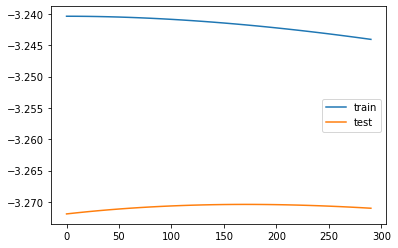

In [42]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

train_scores, test_scores = validation_curve(Ridge(),X,y, param_name = "alpha", param_range = range(0,300,10), cv=5, scoring = "neg_root_mean_squared_error",)

plt.plot(range(0,300,10),np.mean(train_scores,axis=-1), label="train")
plt.plot(range(0,300,10),np.mean(test_scores,axis=-1), label="test")
plt.legend()
plt.show()